In [131]:
import os
import numpy as np
from matplotlib import pyplot
import pandas as pd

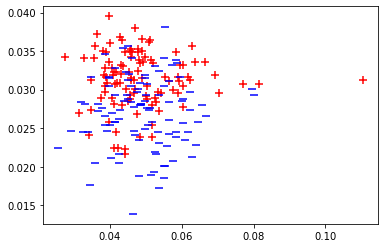

In [132]:
data = pd.read_csv("heart.csv")

#['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

All_X = np.array(data[['chol','thalach','thal']])
All_y = np.array(data["target"])


# Normalization
norm = np.linalg.norm(All_X)
All_X = All_X/norm

# Split dataset into training set and test set
m , n = All_X.shape
size1 = int((m/100)*35)
size2 = int((m/100)*65)

# Training set (70%)
X = np.concatenate((All_X[:size1,:] , All_X[size2:,:])) 
y = np.concatenate((All_y[:size1] , All_y[size2:])) 

# Test set (30%)
X_test = All_X[size1:size2,:]
y_test = All_y[size1:size2]

#plot fisrt 2 column in data
pos = (y==1).ravel()
neg = (y==0).ravel()

pyplot.scatter(X[pos,0], X[pos,1], s=50 , c="r", marker="+")
pyplot.scatter(X[neg,0], X[neg,1], s=50 , c="b", marker="_")
pyplot.show()

In [133]:
def training(X, y, alpha , num_itr):
    wieght = np.zeros(X[0].shape)

    for e in range (num_itr):
        for i, _ in enumerate(X):
            reg = 2 * (1/(e+1)) * wieght
            #Error
            if ( ( y[i] * np.dot(X[i] , wieght) ) < 1 ):
                wieght = wieght + alpha * ( (y[i] * X[i]) - reg )
            #No Error
            else:
                wieght = wieght - (alpha * reg)
            
    return wieght

In [134]:
def predict(X, w):
    p = np.dot(X, w)
    for i in range(len(p)):
        if(p[i] > 1):
            p[i] = 1
        else:
            p[i] = 0
    return p

In [135]:
w = training(X,y,.1,13000)
print("W : " , w)

p = predict(X_test,w)
print("p : " , p)
print("y_test : " , y_test)

print("Accurcy :" , np.mean(p==y_test)*100)

#Tested alpha, number of iterations
# Best : .1 , 13000 => 61%
#     *:  1 , 10000 => 54%
#     *:  5 , 10000 => 34%
#     *: .1 , 10000 => 56%


W :  [16.52985394 12.05031763  0.16168212]
p :  [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.]
y_test :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accurcy : 61.111111111111114
